# JC3503 Assignment - Student Records

---

Student Name: Liu Kai

Student Email: k.liu2.21@abdn.ac.uk

Student ID: 50079690

---

Additional information about the dataset: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

The first step is to import the packages and read the data needed for data mining

In [168]:
# Add any pre-requisites or libraries here
import pandas as pd
import seaborn as sns
import sklearn as sk
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Import the data
df = pd.read_csv("student_records.csv", low_memory=False)

df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


We can clearly see what parts of the data are composed of, how many rows of data are there, and what type of data is each one

First, we need to load the data and view its basic information and statistical summary. Simply understand the information of the data so that you can proceed with the next action

In [169]:

# View basic data information
print(df.info())

# Look at the first few lines of data
print(df.head())

# View summary of data statistics
print(df.describe())

# As you can see here, the data is not lost, so we do not draw lost value heat maps and lost value matrices in the future

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

Using these methods, you can get a rough look at the data and know that there is no missing data in the data set, and this information can guide you in the future

Looking at the number of unique values in each column can help us understand the diversity of the data and possible categorical variables.

In [170]:
print(df.nunique())

Marital status                                      6
Application mode                                   18
Application order                                   8
Course                                             17
Daytime/evening attendance\t                        2
Previous qualification                             17
Previous qualification (grade)                    101
Nacionality                                        21
Mother's qualification                             29
Father's qualification                             34
Mother's occupation                                32
Father's occupation                                46
Admission grade                                   620
Displaced                                           2
Educational special needs                           2
Debtor                                              2
Tuition fees up to date                             2
Gender                                              2
Scholarship holder          

Check for duplicate rows

In [171]:

print(df.duplicated().sum())

0


By looking at the data set, you define the columns of the categories, and then look at the distribution of the values of the categorical variables

In [172]:
categorical_columns = ['Marital status', 'Application mode', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Nacionality', 'Mother\'s qualification', 'Father\'s qualification', 'Mother\'s occupation', 'Father\'s occupation', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'International', 'Target']

# View the distribution of values for categorical variables
for col in categorical_columns:
    print(df[col].value_counts())

Marital status
1    3919
2     379
4      91
5      25
6       6
3       4
Name: count, dtype: int64
Application mode
1     1708
17     872
39     785
43     312
44     213
7      139
18     124
42      77
51      59
16      38
53      35
15      30
5       16
10      10
2        3
57       1
26       1
27       1
Name: count, dtype: int64
Course
9500    766
9147    380
9238    355
9085    337
9773    331
9670    268
9991    268
9254    252
9070    226
171     215
8014    215
9003    210
9853    192
9119    170
9130    141
9556     86
33       12
Name: count, dtype: int64
Daytime/evening attendance\t
1    3941
0     483
Name: count, dtype: int64
Previous qualification
1     3717
39     219
19     162
3      126
12      45
40      40
42      36
2       23
6       16
9       11
4        8
38       7
43       6
10       4
15       2
5        1
14       1
Name: count, dtype: int64
Nacionality
1      4314
41       38
26       14
22       13
6        13
24        5
100       3
11        3
10

At the same time, we can use the box diagram to visualize the data of the interested numeric categories to check the distribution and outliers of the data. Based on this preliminary analysis of the data, we can provide guidance for the subsequent clearing of the data for model training

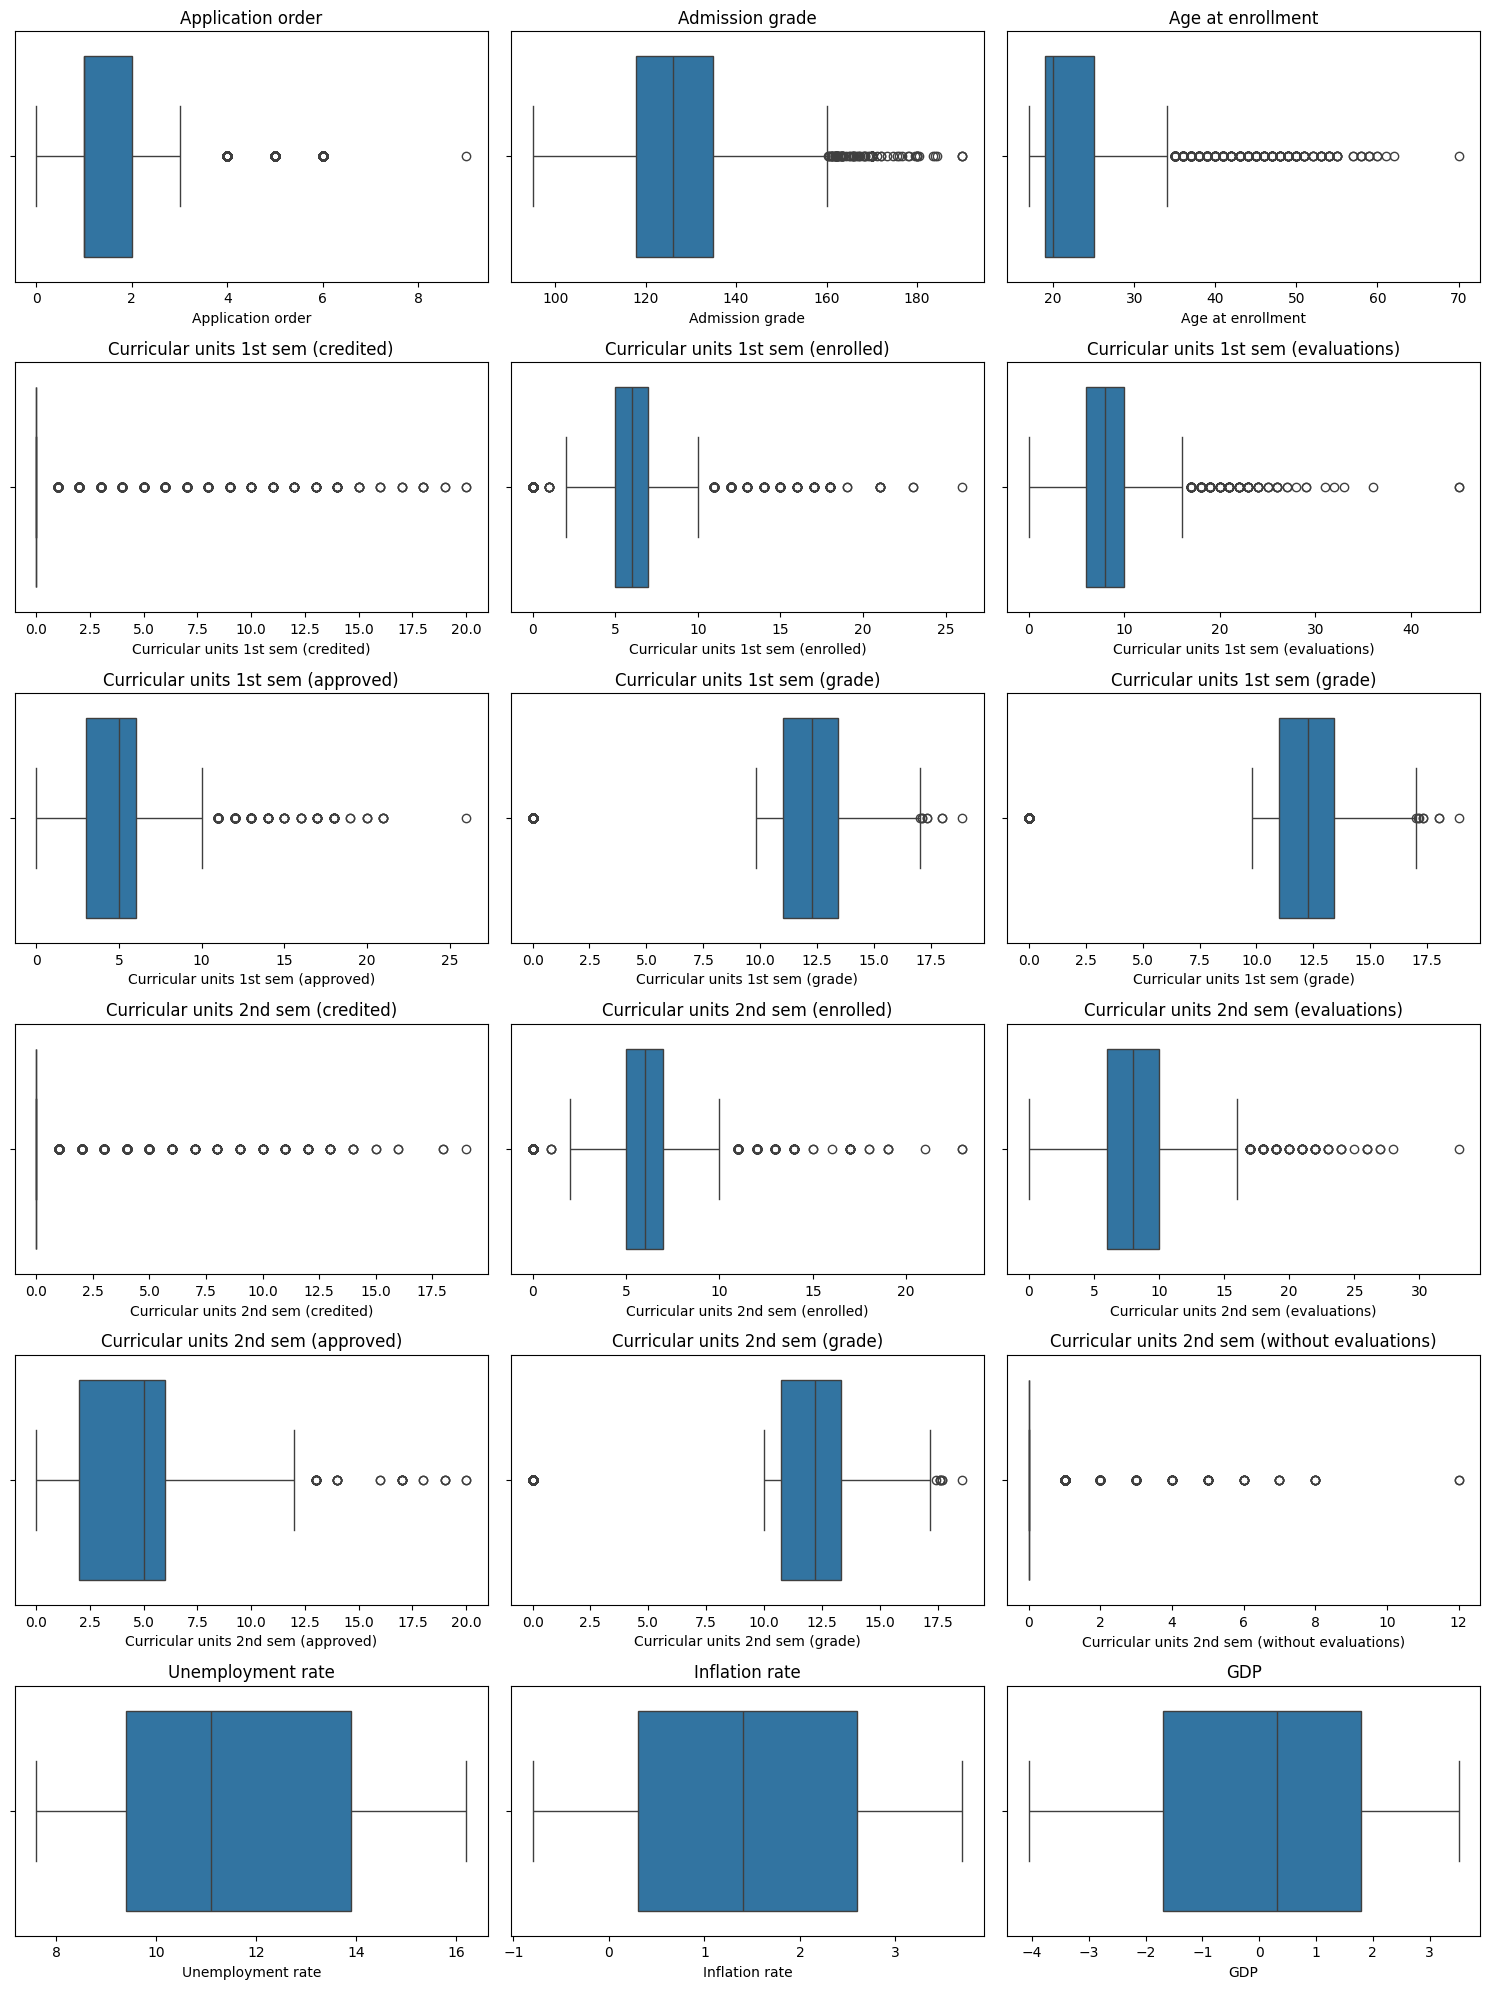

In [173]:
# Check for outliers in numerical variables using box plots
numeric_columns = ['Application order','Admission grade','Age at enrollment','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (grade)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP']

# Set canvas size
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(15, 20))
axes = axes.flatten()

# Plot a box plot for each numerical variable
for ax, col in zip(axes, numeric_columns):
    sns.boxplot(x=df[col], ax=ax)
    ax.set_title(col)

# Adjust the spacing between subgraphs
plt.tight_layout()
plt.show()

By box chart analysis, we can see that most of the data is fairly evenly distributed with a few outliers, but there are slightly disjointed data such as Admission grade, credited, etc. The analysis of these data can be seen at a glance through the box diagram, which provides direction for our data processing and can also understand which data is more useful for subsequent application

After the initial analysis of the feature data, we have a general understanding of it, and we can preview the target data, see the distribution of the target data, and visualize it with a bar chart.

Target
Graduate    2209
Dropout     1421
Enrolled     794
Name: count, dtype: int64


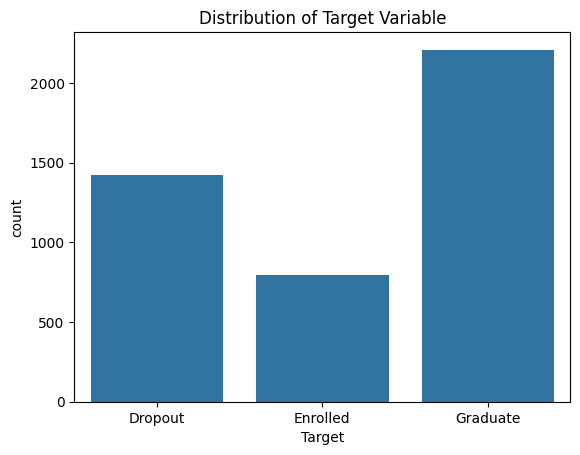

In [174]:
# 打印 Target 列的值计数
print(df['Target'].value_counts())

# 将 Target 列转换为类别变量
df['Target'] = df['Target'].astype('category')

# 可视化 Target 列的值分布
sns.countplot(x='Target', data=df)
plt.title('Distribution of Target Variable')
plt.show()

2.datadata pre-processing

In this step, we will deal with missing values, duplicate values, and convert some variables to the appropriate data type.Even feature selection and data set preparation for subsequent model training and prediction.

For example, from the box chart above, we can see the central tendency and dispersion degree of Admission grade, and the existence of significant high-score outliers in the data. However, the extreme distribution of these outliers may have adverse effects on the model, resulting in underfitting of the model or unsatisfactory prediction results. Therefore, appropriate methods can be adopted to deal with the problem, such as deletion. However, in the case of deletion, it is possible to lose a lot of data and make the model too much to imagine the state and lose robustness. So you can also take smooth, standardized other more robust methods. The following code shows the pre-processing of the deletion, but it was decided not to take this approach after comparing the effects of the subsequent model

In [175]:

#Delete outliers in Admission grade


#Q1 = df['Admission grade'].quantile(0.25)
#Q3 = df['Admission grade'].quantile(0.75)
#IQR = Q3 - Q1
#lower_bound = Q1 - 1.5 * IQR
#upper_bound = Q3 + 1.5 * IQR
#df = df[(df['Admission grade'] >= lower_bound) & (df['Admission grade'] <= upper_bound)]

#sns.boxplot(x=df['Admission grade'])
#plt.show()


The next step is feature selection, which aims to find out the variables most related to the target variables for model training and prediction, and eliminate the irrelevant variables to reduce the complexity of the model and prevent overfitting and useless resource consumption. In the following, we use two methods for feature selection, after which features are selected by intersection for correlation analysis, more relevant features are eliminated, and the final features are obtained.

This is a feature selection method that uses univariate analysis of variance (ANOVA) to evaluate the relationship between each feature and the target variable, and then selects the top k features with the highest scores. This approach takes into account the differences between features and the relationship between target variables.

In [176]:
#SelectKBest：Univariate analysis of variance (ANOVA) is used to select the features that are most significantly related to the target variable

from sklearn.feature_selection import SelectKBest, f_classif


X = df.drop('Target', axis=1)
y = df['Target']

# Choose K best features
selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support()]
selected_features = list(selected_features)
print("Selected features using SelectKBest:", selected_features)

Selected features using SelectKBest: ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)']


We calculated the correlation between each feature and the target variable, using Pearson correlation coefficients for numerical variables and Chi-Square statistics for categorical variables. This approach focuses on the correlation of each individual feature to the target variable.

c:\Users\Administrator\.conda\envs\ML\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


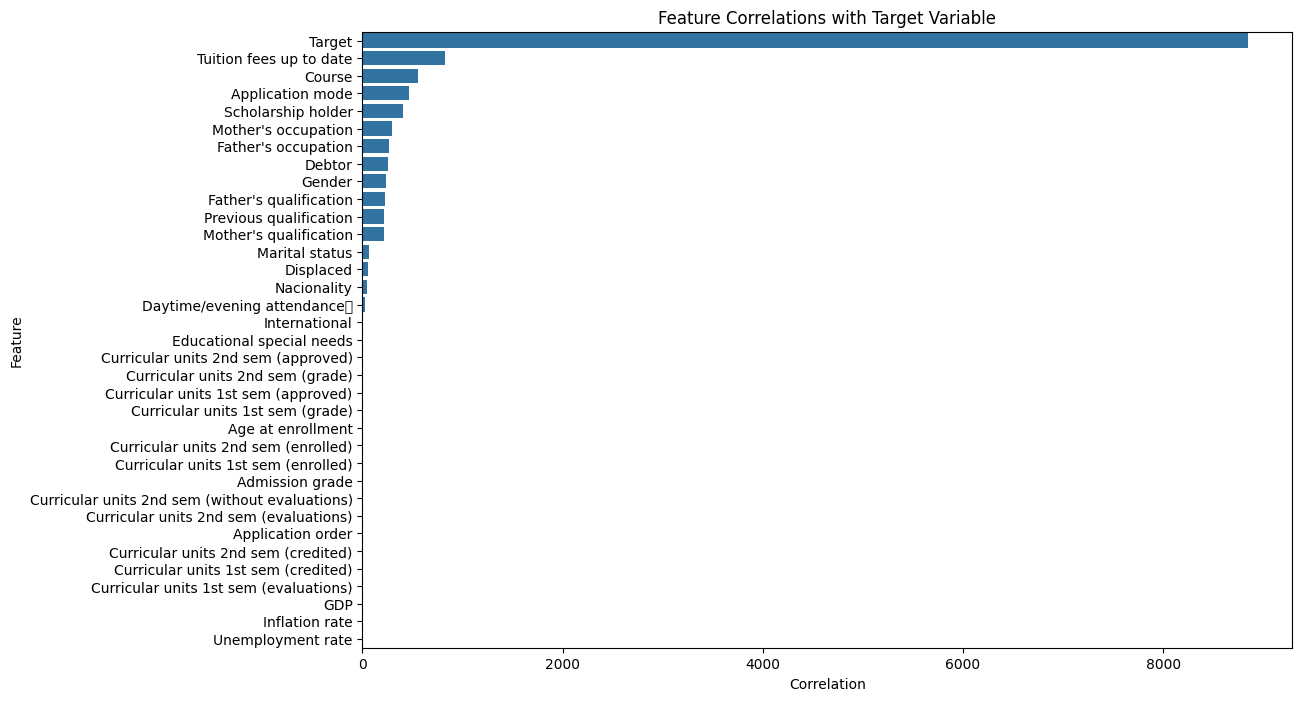

Top 10 correlation features: ['Tuition fees up to date', 'Course', 'Application mode', 'Scholarship holder', "Mother's occupation", "Father's occupation", 'Debtor', 'Gender', "Father's qualification", 'Previous qualification']


In [177]:
#Correlation graph method: The correlation between a single feature and the target variable is calculated, and the feature is selected according to the correlation size.

# target variable
target = 'Target'

# Initializes a dictionary to store the correlation coefficients
correlation_dict = {}

# Calculate correlations between categorical variables and target variables (using Chi-Square statistics)
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df[target])
    chi2, p, dof, ex = chi2_contingency(contingency_table)
    correlation_dict[col] = chi2

# Calculate the correlation between the numerical variable and the target variable (using Pearson correlation coefficient)
label_encoder = LabelEncoder()
df[target] = label_encoder.fit_transform(df[target])  # Converts the target variable to a value
for col in numeric_columns:
    correlation_dict[col] = np.abs(df[col].corr(df[target]))

# Rank the correlation coefficients and plot them in a bar chart
correlation_df = pd.DataFrame(list(correlation_dict.items()), columns=['Feature', 'Correlation'])
correlation_df = correlation_df.sort_values(by='Correlation', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Correlation', y='Feature', data=correlation_df)
plt.title('Feature Correlations with Target Variable')
plt.show()

top10_correlation_features = correlation_df['Feature'].head(11).tolist()
top10_correlation_features.pop(0)
print("Top 10 correlation features:", top10_correlation_features)


From this bar chart, it can be intuitively seen which features have the highest correlation with Targe, which provides us with guiding significance in feature selection. From high to low are 'Tuition fees up to date', 'Course', 'Application mode', 'Scholarship holder', 'Mother's occupation ', "Father's occupation", "Debtor "," Gender ", "Father's qualification", "Previous qualification", the latter is hardly relevant。

Then, we use the features selected by these two different methods to conduct correlation analysis, and use heat maps to visualize the results to facilitate our artificial feature selection

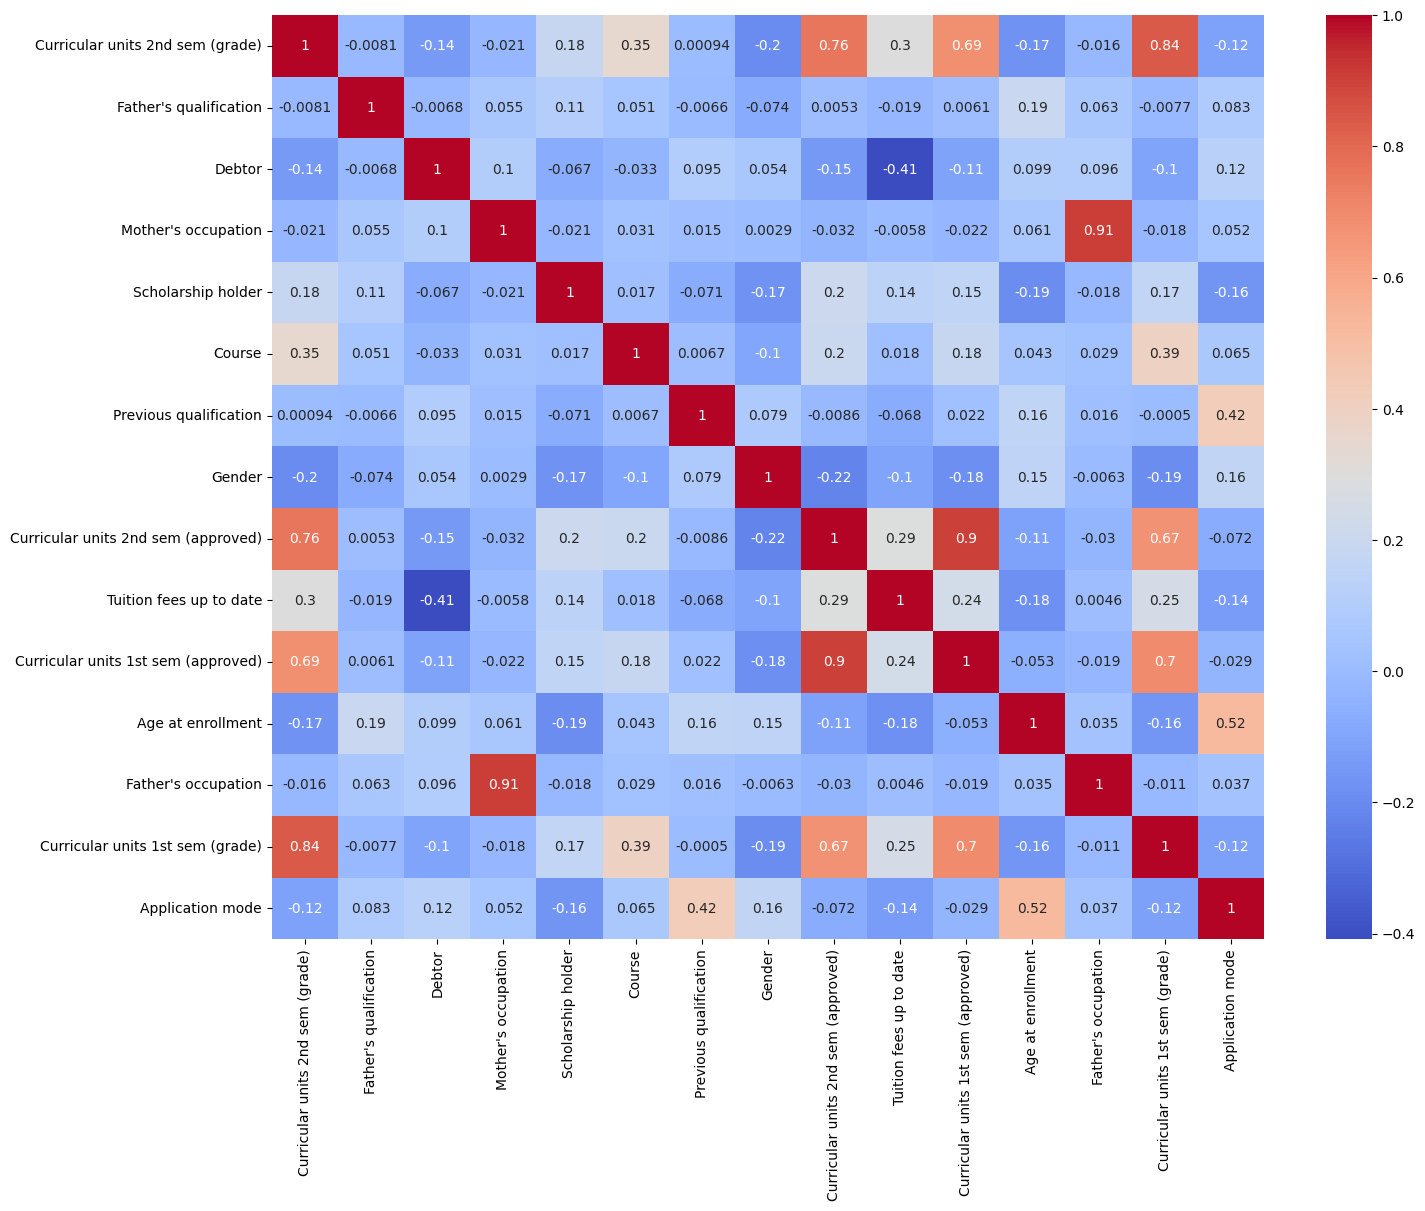

In [178]:
intersection_features = list(set(selected_features) & set(top10_correlation_features))
union_features = list(set(top10_correlation_features) | set(selected_features))

# Select these features from the data set
numeric_df = df[union_features]

# View correlation matrix
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

Thermal maps are used to identify highly correlated feature pairs and selectively delete or combine these features.
Removing highly correlated features can reduce multicollinearity problems and improve model stability and interpretability.
The feature set selected should retain as much information as possible while reducing the number of features.
This method can not only optimize the feature selection, but also improve the performance and stability of the model

According to the heat map analysis results, remove highly correlated features. If the correlation between the two features is too high (e.g. > 0.8), multicollinearity problems may be caused during modeling. Consider removing one of these features or combining them.
For example, we can see in the figure that the positive correlation between Mother's occupation and Father's occupation is 0.91, so we decide to eliminate a feature for subsequent training

In [179]:
# data partitioning
final_selected_features = ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 
                     'Scholarship holder', 'Age at enrollment', 'Curricular units 1st sem (grade)', 
                     'Course', 'Previous qualification','Father\'s qualification']

X1 = df[final_selected_features]  # Use the final selection feature
y1 = df['Target']

#Scale the feature to the same range
scaler = StandardScaler()
X1 = scaler.fit_transform(X1)

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)



Grouping analysis, though, calculates the average value of the target variable by feature grouping: in this way, it is possible to see how different groups of each feature perform differently on the target variable. For example, the average grades of students with or without scholarships can be compared, or the average performance of students in different courses. It seems convenient for feature selection, but in fact, even after the selection of features, then group analysis is a very valuable step:
Verify the effectiveness of feature selection: By viewing the average value and distribution of target variables after grouping, we can verify whether the selected features have significant differences between different groups.
Deep understanding of the data: Even after the features have been selected, group analysis can still reveal more details, helping to understand the complexity and potential patterns of the data.
Finding new patterns: Group analysis may reveal new patterns or anomalies, suggesting further data processing or feature engineering.
In conclusion, grouping analysis is a valuable EDA technique that can be used after feature selection to validate selected features and gain insight into the data, providing stronger support for subsequent modeling and prediction.

Mean Target by Application mode:
Application mode
1     1.420375
2     0.666667
5     1.250000
7     0.726619
10    1.400000
15    1.333333
16    1.526316
17    1.230505
18    1.145161
26    0.000000
27    0.000000
39    0.737580
42    0.974026
43    1.022436
44    1.145540
51    1.101695
53    1.485714
57    2.000000
Name: Target, dtype: float64


Mean Target by Debtor:
Debtor
0    1.254782
1    0.580517
Name: Target, dtype: float64


Mean Target by Tuition fees up to date:
Tuition fees up to date
0    0.189394
1    1.312115
Name: Target, dtype: float64


Mean Target by Gender:
Gender
0    1.328103
1    0.901671
Name: Target, dtype: float64


Mean Target by Scholarship holder:
Scholarship holder
0    1.026165
1    1.637853
Name: Target, dtype: float64


Mean Target by Age at enrollment:
Age at enrollment
17    1.600000
18    1.444015
19    1.373216
20    1.322204
21    1.204969
22    1.120690
23    1.018519
24    0.916031
25    0.763441
26    0.691489
27    0.659341
28    0.686747
29 

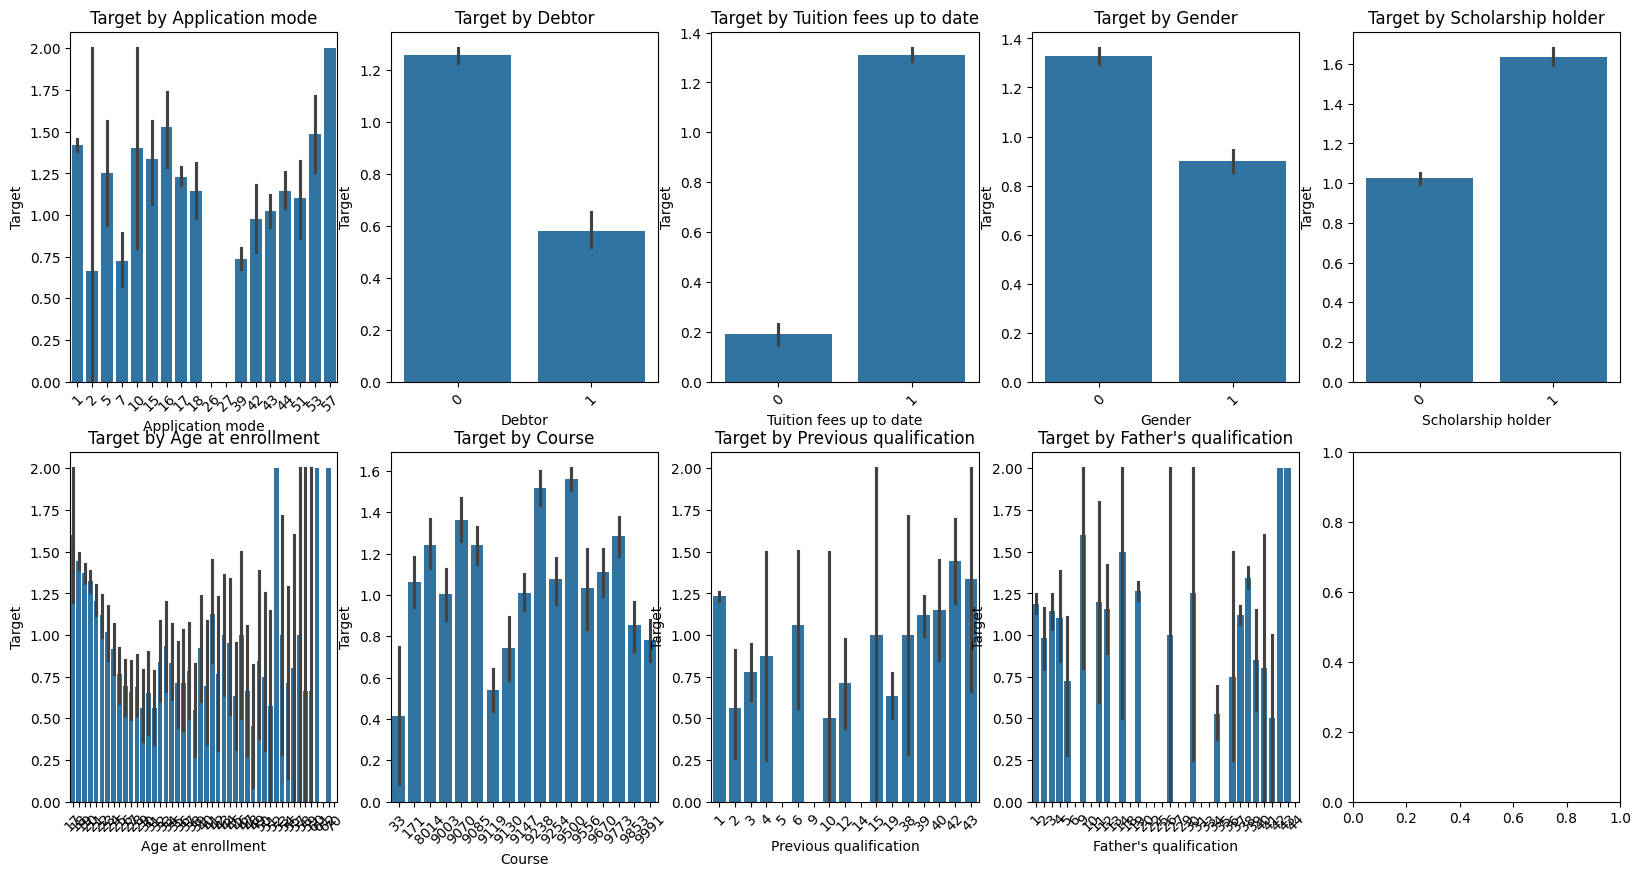

In [180]:
# Group summary analysis: The average value of the target variable is calculated by grouping each feature
final_selected_features1 = ['Application mode', 'Debtor', 'Tuition fees up to date', 'Gender', 
                     'Scholarship holder', 'Age at enrollment', 
                     'Course', 'Previous qualification','Father\'s qualification']

for feature in final_selected_features1:
    grouped = df.groupby(feature)[target].mean()
    print(f'Mean {target} by {feature}:')
    print(grouped)
    print('\n')

# Create a subgraph with 2 rows and 5 columns
fig, axes = plt.subplots(2, 5, figsize=(20, 10))
axes = axes.flatten()

# Plot the relationship between each feature and the target variable
for i, feature in enumerate(final_selected_features1):
    sns.barplot(x=feature, y=target, data=df, ax=axes[i])
    axes[i].set_title(f'{target} by {feature}')
    axes[i].tick_params(axis='x', rotation=45)

Different application modes have different average Target values: Different application modes have significantly different average target values. These differences may be related to student backgrounds, entry requirements, support policies, etc. under different application modes. Debt status affects Target variables: As can be seen from the results, some debt status (e.g. 44) had a target average of 0.000000, which may indicate that these students performed less academically. Debt has a significant impact on a student's academic performance. Schools can provide more financial support and tutoring resources to help students with debt relieve financial stress and thus enhance their academic performance. Through these analyses and recommendations, students' academic performance can be better understood and enhanced, especially for students with different application patterns and debt situations.


Skewness and kurtosis analysis are important steps in exploratory data analysis (EDA) to describe the shape and characteristics of a data distribution.

Skewness
Skewness measures the symmetry of the data distribution. Specifically, it describes how skewed the data distribution is relative to the normal distribution.

Positive skewness (positive skewness) : The right tail of the data distribution is long, with most data concentrated on the left.
Negative skewness (negative skewness) : The left tail of the data distribution is long, with most data concentrated on the right.
Skewness of 0: The data distribution is symmetric and consistent with the normal distribution.
Kurtosis
Kurtosis measures the degree to which a data distribution spikes. Specifically, it describes the tail thickness and peak height of the data distribution.

Peak state (positive kurtosis) : The data distribution is sharper than the normal distribution, with a thicker tail.
Low peak (negative kurtosis) : The data distribution is flatter than the normal distribution, with a thinner tail.
A kurtosis of 0: The data distribution is consistent with the peak degree of the normal distribution.
The use of skewness and kurtosis
The shape of the data distribution: Understanding the shape of the data distribution can help us choose the appropriate statistical methods and models. If the data distribution is skewed or has spikes, a transformation (such as a logarithmic transformation) may be required to bring the data closer to a normal distribution.
Outlier detection: The distribution of peaks usually indicates the presence of outliers in the data. These outliers may require further processing.
Model hypothesis validation: Many statistical methods and machine learning models assume that the data is normally distributed. Skewness and kurtosis analysis can help test these assumptions and transform the data if necessary.

In [181]:
#Calculate and plot skewness and kurtosis to understand the symmetry and spiking of the data
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis
for col in final_selected_features:
    print(f'{col} skewness: {skew(df[col])}')
    print(f'{col} kurtosis: {kurtosis(df[col])}')

Application mode skewness: 0.3929024448846655
Application mode kurtosis: -1.4535194406553222
Debtor skewness: 2.433826663785401
Debtor kurtosis: 3.9235122293527764
Tuition fees up to date skewness: -2.3482571181092844
Tuition fees up to date kurtosis: 3.5143114927509194
Gender skewness: 0.6210684462458353
Gender kurtosis: -1.6142739850777836
Scholarship holder skewness: 1.1644758575409984
Scholarship holder kurtosis: -0.6439959772041575
Age at enrollment skewness: 2.0542915401023834
Age at enrollment kurtosis: 4.120873165187086
Curricular units 1st sem (grade) skewness: -1.5676138493937792
Curricular units 1st sem (grade) kurtosis: 0.9060786812265382
Course skewness: -3.807843535570372
Course kurtosis: 13.18288019357285
Previous qualification skewness: 2.870233175678923
Previous qualification kurtosis: 6.7691520332721655
Father's qualification skewness: -0.29859593350882185
Father's qualification kurtosis: -1.5801619058389085


After a series of data analyses, data cleaning and data set preparation, we can begin to train models that can be used to predict, for example, in this dataset, provide information about a student and we can predict graduation or academic success.
Here, random forest classifier and xgboost classifier are used to train and predict the model, and confusion matrix is used to evaluate the quality of the model

In [182]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


# Initialize and train a random forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate models
y_pred = model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[202  34  80]
 [ 42  28  81]
 [ 24  34 360]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       316
           1       0.29      0.19      0.23       151
           2       0.69      0.86      0.77       418

    accuracy                           0.67       885
   macro avg       0.58      0.56      0.56       885
weighted avg       0.65      0.67      0.65       885



In [183]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix

# Initializes and trains the XGBoost classifier
xgb_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Predict and evaluate models
y_pred_xgb = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

[[221  29  66]
 [ 43  28  80]
 [ 25  19 374]]
              precision    recall  f1-score   support

           0       0.76      0.70      0.73       316
           1       0.37      0.19      0.25       151
           2       0.72      0.89      0.80       418

    accuracy                           0.70       885
   macro avg       0.62      0.59      0.59       885
weighted avg       0.68      0.70      0.68       885



After predicting graduation, we assess students' academic success. However, since there is no direct indicator in the data set to evaluate students' academic success, I decided to use the average grades of the first semester and the second semester as a measure. It is then visualized to show the distribution and combined with target to chart the relationship between student achievement and final outcome

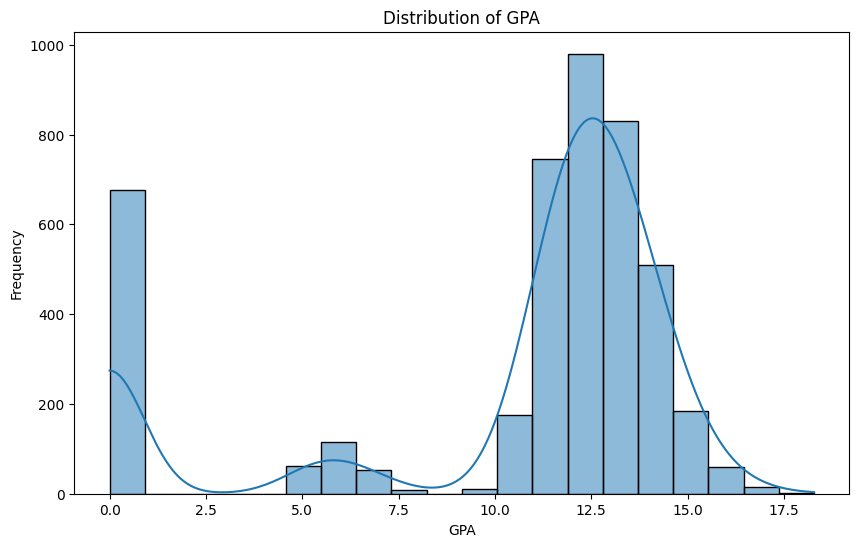

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21680\1418812055.py:24: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gpa_target_counts = df.groupby(['GPA Range', 'Target']).size().unstack().fillna(0)


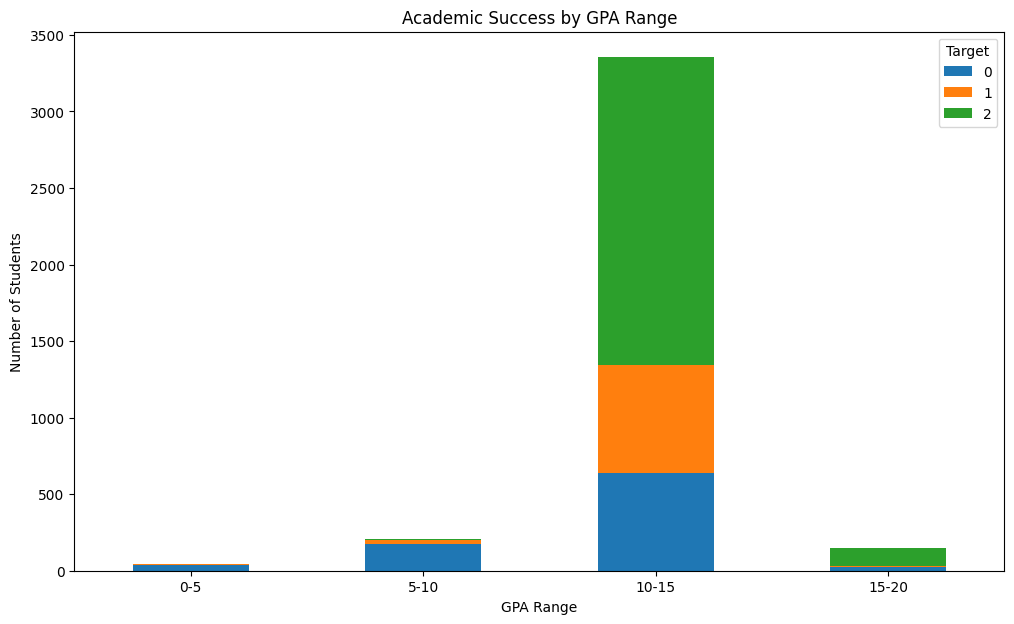

In [184]:
# Calculate GPA as the average of grades from both semesters
df['GPA'] = (df['Curricular units 1st sem (grade)'] + df['Curricular units 2nd sem (grade)']) / 2

# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot the distribution of GPA
sns.histplot(df['GPA'], bins=20, kde=True)
plt.title('Distribution of GPA')
plt.xlabel('GPA')
plt.ylabel('Frequency')

# Show the plot
plt.show()

# Define GPA bins
bins = [0, 5, 10, 15, 20]
labels = ['0-5', '5-10', '10-15', '15-20']

# Create a new column 'GPA Range' based on the bins
df['GPA Range'] = pd.cut(df['GPA'], bins=bins, labels=labels)

# Calculate the count of 'Graduate' and 'Dropout' in each GPA range
gpa_target_counts = df.groupby(['GPA Range', 'Target']).size().unstack().fillna(0)

# Plot the results
gpa_target_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Academic Success by GPA Range')
plt.xlabel('GPA Range')
plt.ylabel('Number of Students')
plt.legend(title='Target')
plt.xticks(rotation=0)

# Show the plot
plt.show()


At the same time, we also cross-analyzed the relationship between the results and students' scholarship situation and the relationship between grades and scholarship situation. The distribution can be clearly seen from the bar chart, which is convenient for our analysis

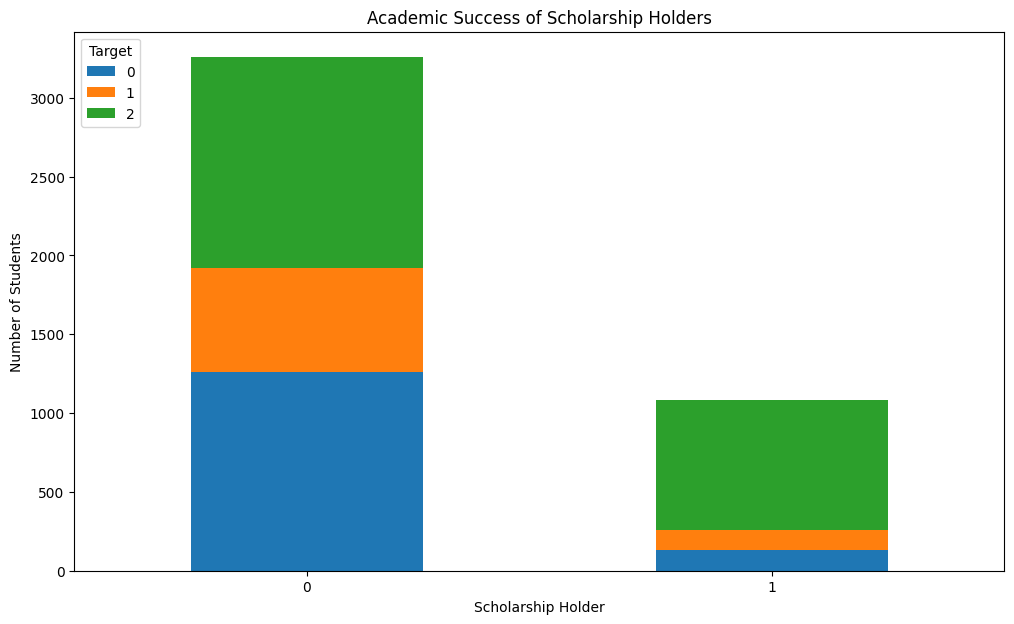

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21680\834277716.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  combined_counts = df.groupby(['GPA Range', 'Scholarship holder', 'Target']).size().unstack().fillna(0)


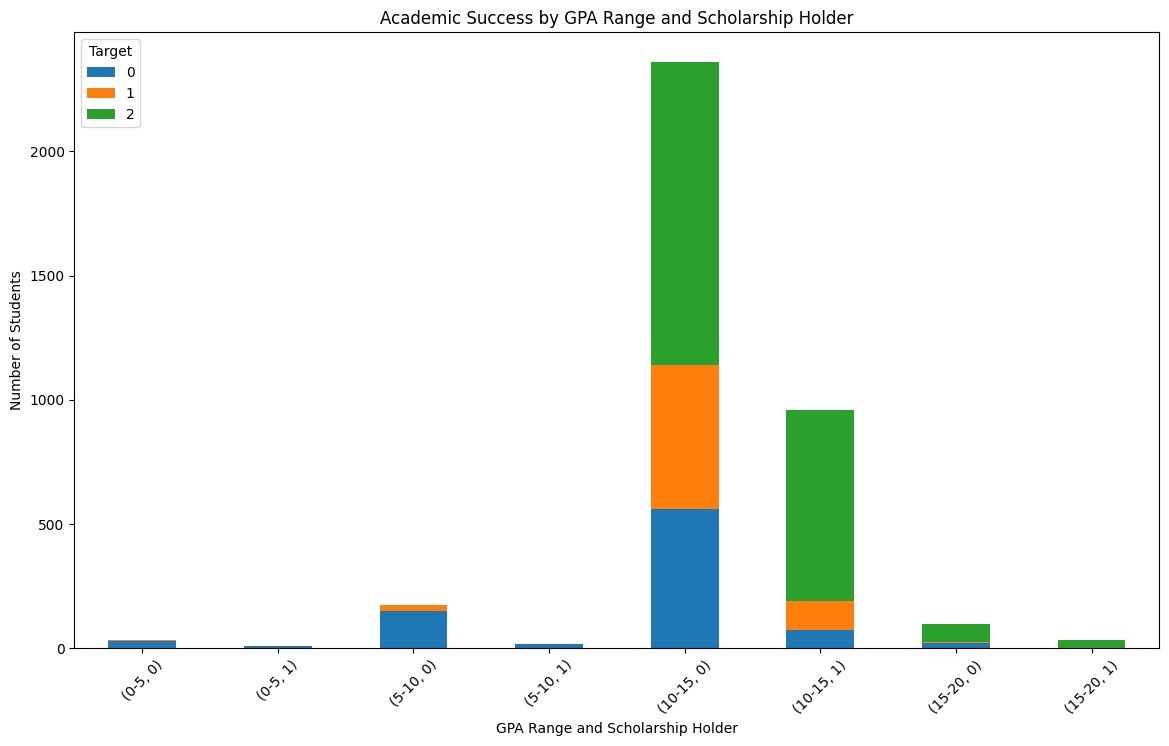

In [68]:
# Analyze scholarship holders
scholarship_counts = df.groupby(['Scholarship holder', 'Target']).size().unstack().fillna(0)

# Plot scholarship holders' academic success
scholarship_counts.plot(kind='bar', stacked=True, figsize=(12, 7))
plt.title('Academic Success of Scholarship Holders')
plt.xlabel('Scholarship Holder')
plt.ylabel('Number of Students')
plt.legend(title='Target', loc='upper left')
plt.xticks(rotation=0)
plt.show()

# Combine GPA Range and Scholarship holder for analysis
combined_counts = df.groupby(['GPA Range', 'Scholarship holder', 'Target']).size().unstack().fillna(0)

# Plot combined analysis
combined_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Academic Success by GPA Range and Scholarship Holder')
plt.xlabel('GPA Range and Scholarship Holder')
plt.ylabel('Number of Students')
plt.legend(title='Target', loc='upper left')
plt.xticks(rotation=45)
plt.show()

From these bar charts, we can easily draw some conclusions, such as the distribution of gpa is more than 10 to 17, and a large part of students are 0, while the rest are a minority. While the students at dropout are mostly low achievers, a few have won scholarships, and most have won scholarships for students with high achievers.